# Week 4: Functions<br>in R

POP77001 Computer Programming for Social Scientists

Tom Paskhalis

## Overview

-   Decomposition and abstraction
-   Function definition and function call
-   Functionals
-   Scoping in R

## Decomposition and Abstraction

-   So far: built-in types, assignments, branching and looping
    constructs.
-   In principle, any problem can be solved just with those.
-   But a solution would be non-modular and hard-to-maintain.
-   Functions provide **decomposition** and **abstraction**.

## Solving General Problem

<figure>
<img src="https://imgs.xkcd.com/comics/the_general_problem.png"
alt="xkcd" />
<figcaption aria-hidden="true"><a
href="https://xkcd.com/974/">xkcd</a></figcaption>
</figure>

## Using Function to Modularize Code

Before

After

``` r
mark <- 71
if (mark >= 70) {
  grade <- "I"
} else if (mark >= 60) {
  grade <- "II.1"
} else if (mark >= 50) {
  grade <- "II.2"
} else {
  grade <- "F"
}
grade
```

    [1] "I"

``` r
convert_mark_to_grade <- function(mark) {
  if (mark >= 70) {
    grade <- "I"
  } else if (mark >= 60) {
    grade <- "II.1"
  } else if (mark >= 50) {
    grade <- "II.2"
  } else {
    grade <- "F"
  }
  grade
}
mark <- 71
grade <- convert_mark_to_grade(mark)
grade
```

    [1] "I"

# Function

## Function in Mathematics

-   A concept of **function** comes from mathematics, where:
    $$f: X \rightarrow Y$$ describes a mapping (function $f$) between a
    set of inputs $X$ and a set of possible outputs $Y$.
-   E.g. a random variable $X$ assigns a numerical value $\mathbb{R}$
    (real number) to each possible outcome ($s \in S$) of a random
    experiment: $$X: S \rightarrow \mathbb{R}$$ Or, alternatively:
    $$X(s) = x$$

## Function in Mathematics

-   Of course, we could express the following idea in computer code.
    $$X(s) = x$$

. . .

-   E.g. when modelling a coin-tossing experiment, we might be
    interested in the random variable $X$, which is the number of heads.

. . .

In [ ]:
X <- function(s) {
  sum(s == "H")
}

. . .

-   Let’s say that the experiment consists of 10 coin tosses.

. . .

In [ ]:
# "H" stands for heads and "T" for tails.
s <- sample(c("H", "T"), 10, replace = TRUE)
s

 [1] "T" "H" "T" "T" "T" "H" "H" "H" "H" "H"

. . .

-   Our random variable $X$ then assigns (maps) a value $x$ to the
    outcome $s$.

In [ ]:
X(s)

[1] 6

## Function in Programming

-   The mathematical definition of a function $f(x) = y$ describes an
    *idealised* programming function.
-   The expression above states that $y$ fully describes the result of
    applying $f$ to $x$.
-   In other words, the function $f$ does not:
    -   have any side-effects (writing to a file, printing to the
        console, etc.)
    -   depend on anything else other than the input $x$ (OS, network,
        etc.)
-   Of course, many real-world programming functions cannot be that
    restrictive.

## Function in R

> Everything that happens in R is a function call.
>
> John Chambers

. . .

-   **Function call** is the centerpiece of computation in R.
-   It involves function object and objects that are supplied as
    arguments.
-   In R we use function `function()` to create a function object.
-   As functions *enclose* environments, they are also referred to as
    **closures**.

## Function Definition

-   Before any function could be used (**called**) it has to be created
    (**defined**).
-   Function definition binds the name to an R object of type `function`
    (`closure`).
-   R also comes with many pre-defined (**built-in**) functions.

. . .

    <function_name> <- function(<arg_1>, <arg_2>, ..., <arg_n>) {
      <function_body>
    }

. . .

In [ ]:
fun <- function(arg) {
  # <function_body>
}

. . .

In [ ]:
typeof(fun)

[1] "closure"

. . .

In [ ]:
is.function(fun)

[1] TRUE

## Function Components

-   **Body** - code inside the function.
    -   Can be accessed with `body()`
-   List of **arguments** - controls how function is called.
    -   Can be accessed with `formals()`
-   **Environment** (aka scope/namespace) - location of function’s
    definition and variables.
    -   Can be accessed with `environment()`

## Function Components: Example

In [ ]:
is_positive <- function(num) {
  if (num > 0) {
    return(TRUE)
  } else {
    return(FALSE)
  }
}

. . .

In [ ]:
body(is_positive)

{
    if (num > 0) {
        return(TRUE)
    }
    else {
        return(FALSE)
    }
}

. . .

In [ ]:
formals(is_positive)

$num

. . .

In [ ]:
environment(is_positive)

<environment: R_GlobalEnv>

## Function Call

-   Function is executed until:
    -   Either `return()` function is encountered
    -   There are no more expressions to evaluate
-   Function call always returns a value:
    -   Argument of `return()` function call, or
    -   Value of last expression if no `return()` (implicit return), or
    -   `NULL` if no `return()` and no expressions to evaluate
-   Function can return only one object
    -   But you can combine multiple R objects in a list

## Function Call: Example

In [ ]:
is_positive <- function(num) {
  if (num > 0) {
    res <- TRUE
  } else {
    res <- FALSE
  }
  return(res)
}

. . .

In [ ]:
res_1 <- is_positive(5)
res_2 <- is_positive(-7)

. . .

In [ ]:
print(res_1)

[1] TRUE

[1] FALSE

## Implicit Return: Good Example

In [ ]:
is_positive <- function(num) {
  if (num > 0) {
    res <- TRUE
  } else {
    res <- FALSE
  }
  res
}

. . .

In [ ]:
res_1 <- is_positive(5)
res_2 <- is_positive(-7)

. . .

In [ ]:
print(res_1)

[1] TRUE

[1] FALSE

## Implicit Return: Bad Example

In [ ]:
# While this function provides the same functionality
# as the two versions above, this is an example of
# a bad programming style, as return value is very unintuitive.
is_positive <- function(num) {
  if (num > 0) {
    res <- TRUE
  } else {
    res <- FALSE
  }
}

. . .

In [ ]:
res_1 <- is_positive(5)
res_2 <- is_positive(-7)

. . .

In [ ]:
print(res_1)

[1] TRUE

[1] FALSE

# Arguments

## Function Arguments

-   **Arguments** provide a way of giving input to a function
-   Arguments in function definition are **formal arguments**
-   Arguments in function invocations are **actual arguments**.
-   When a function is invoked (called) arguments are matched and bound
    to local variable names
-   R matches arguments in 3 ways:
    1.  by *exact name*
    2.  by *partial name*
    3.  by *position*
-   It is a good idea to only use unnamed (positional) for the main
    (first one or two) arguments

## Function Arguments: Example

In [ ]:
format_date <- function(day, month, year, reverse = TRUE) {
  if (isTRUE(reverse)) {
    formatted <- paste(
      as.character(year), as.character(month), as.character(day), sep = "-"
    )
  } else {
    formatted <- paste(
      as.character(day), as.character(month), as.character(year), sep = "-"
    )
  }
  return(formatted)
}

. . .

In [ ]:
# Saves space and typing,
# fine for ad hoc analysis and popular functions
format_date(30, 9, 2024)

[1] "2024-9-30"

. . .

In [ ]:
# Good function call, full names provided
format_date(year = 2024, month = 9, day = 30)

[1] "2024-9-30"

. . .

In [ ]:
# Technically correct, but rather unintuitive
format_date(y = 2024, m = 9, d = 30, FALSE)

[1] "30-9-2024"

. . .

In [ ]:
# Technically correct, but rather unintuitive
format_date(day = 30, month = 9, year = 2024, FALSE)

[1] "30-9-2024"

## `...` (Ellipsis)

-   Similar to other programming languages, functions in R can take a
    variable number of arguments.
-   This is implemented using the `...` (aka ellipsis or dot-dot-dot)
    argument.
-   A function that uses it is said to be **variadic**.
-   One of main usecases is to create functions that can take other
    functions as arguments (functionals).
-   Thus requires flexibility in the number of arguments.

. . .

In [ ]:
varfun <- function(...) {
  n_vars <- length(list(...))
  n_vars
}
varfun(1, 2, 3)

[1] 3

# Combining Functions

## Function Composition

-   Multiple function calls can be combined together.
-   In a simple case this can be done using nested function calls.
-   Such that the outer function is applied to the result of the inner
    function.

. . .

In [ ]:
sqrt(abs(-9))

[1] 3

## Pipe Operator

-   Nesting several function calls, however, can make code less
    readable.
-   R allows to chain function calls together using the pipe operator
    `|>`.
-   This was introduced in R 4.1.0 as a native operator.
-   In most (but not all) ways it is analogous to the pipe operator
    `%>%` (`magrittr` package).

. . .

In [ ]:
# We can now rewrite the previous example as
-9 |>
  abs() |>
  sqrt()

[1] 3

. . .

In [ ]:
# Compare to %>% from `magrittr` package
library(magrittr)
-9 %>%
  abs() %>%
  sqrt()

[1] 3

# Environment

## Nested Functions

In [ ]:
which_integer <- function(num) {
  even_or_odd <- function(num) {
    if (num %% 2 == 0) {
      return("even")
    } else {
      return("odd")
    }
  }
  eo <- even_or_odd(num)
  if (num > 0) {
    return(paste0("positive ", eo))
  } else if (num < 0) {
    return(paste0("negative ", eo))
  } else {
    return("zero")
  }
}

. . .

In [ ]:
which_integer(-43)

[1] "negative odd"

. . .

In [ ]:
even_or_odd(-43)

## Environments

-   Binding of objects to names (assignment) happens within a specific
    **environment**.

In [ ]:
x <- c(1, 2, 3)

. . .

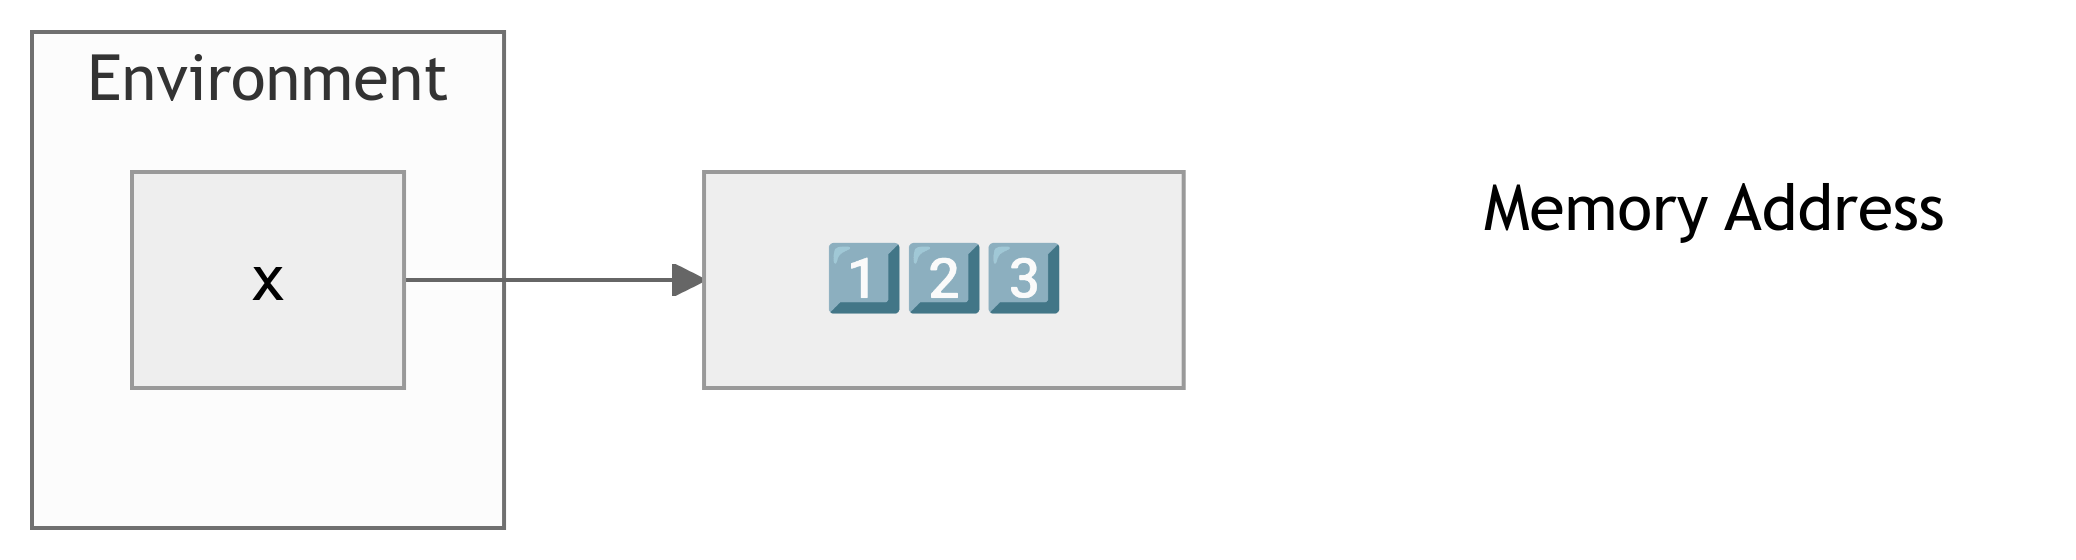

. . .

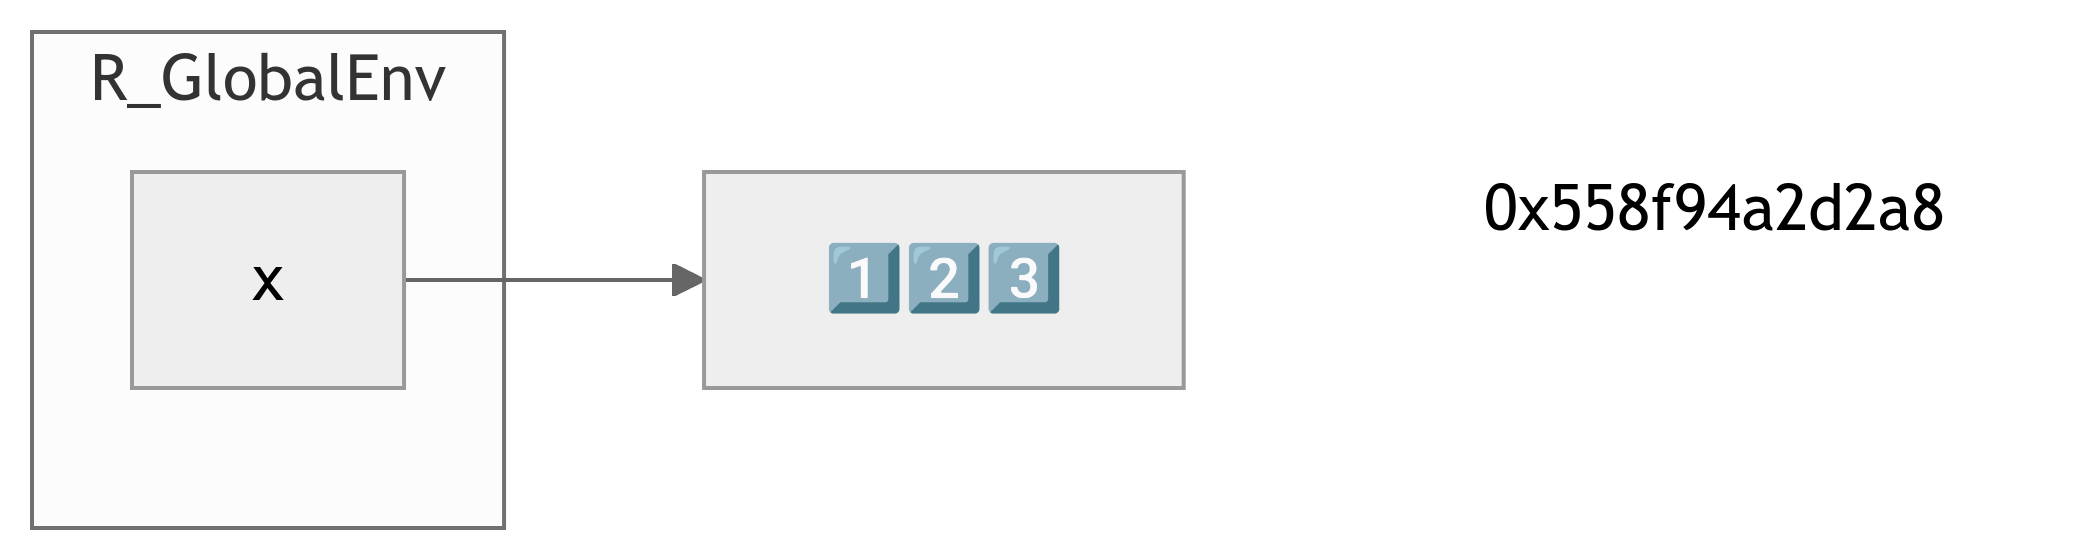

## R Environment

-   Variables (aka names) exist in an **environment** (aka
    namespace/scope).
-   Most environments get created by function calls.
-   As functions *enclose* environments, they are called **closures**.
-   Approximate hierarchy of environments:
    1.  <u>Execution</u> environment of a function
    2.  <u>Global</u> environment of a script
    3.  <u>Package</u> environment of any loaded packages
    4.  <u>Base</u> environment of base R objects
-   If a variable cannot found in the current environment, R will look
    in the parent environment.

## R Environment: Example

In [ ]:
x <- 42
# is equivalent to:
# Binding R object '42', double vector of length 1,
# to name 'x' in the global environment
assign("x", 42, envir = .GlobalEnv)
x

[1] 42

. . .

In [ ]:
x <- 5
foo <- function() {
  x <- 12
  return(x)
}
y <- foo()

. . .

In [ ]:
print(y)

[1] 12

. . .

In [ ]:
print(x)

[1] 5

## Revisiting Assignment

-   R has 2 main assignment operators: `<-` and `<<-`
-   While `=` is also supported, it is not recommended.
-   `<-` assigns to the current environment

. . .

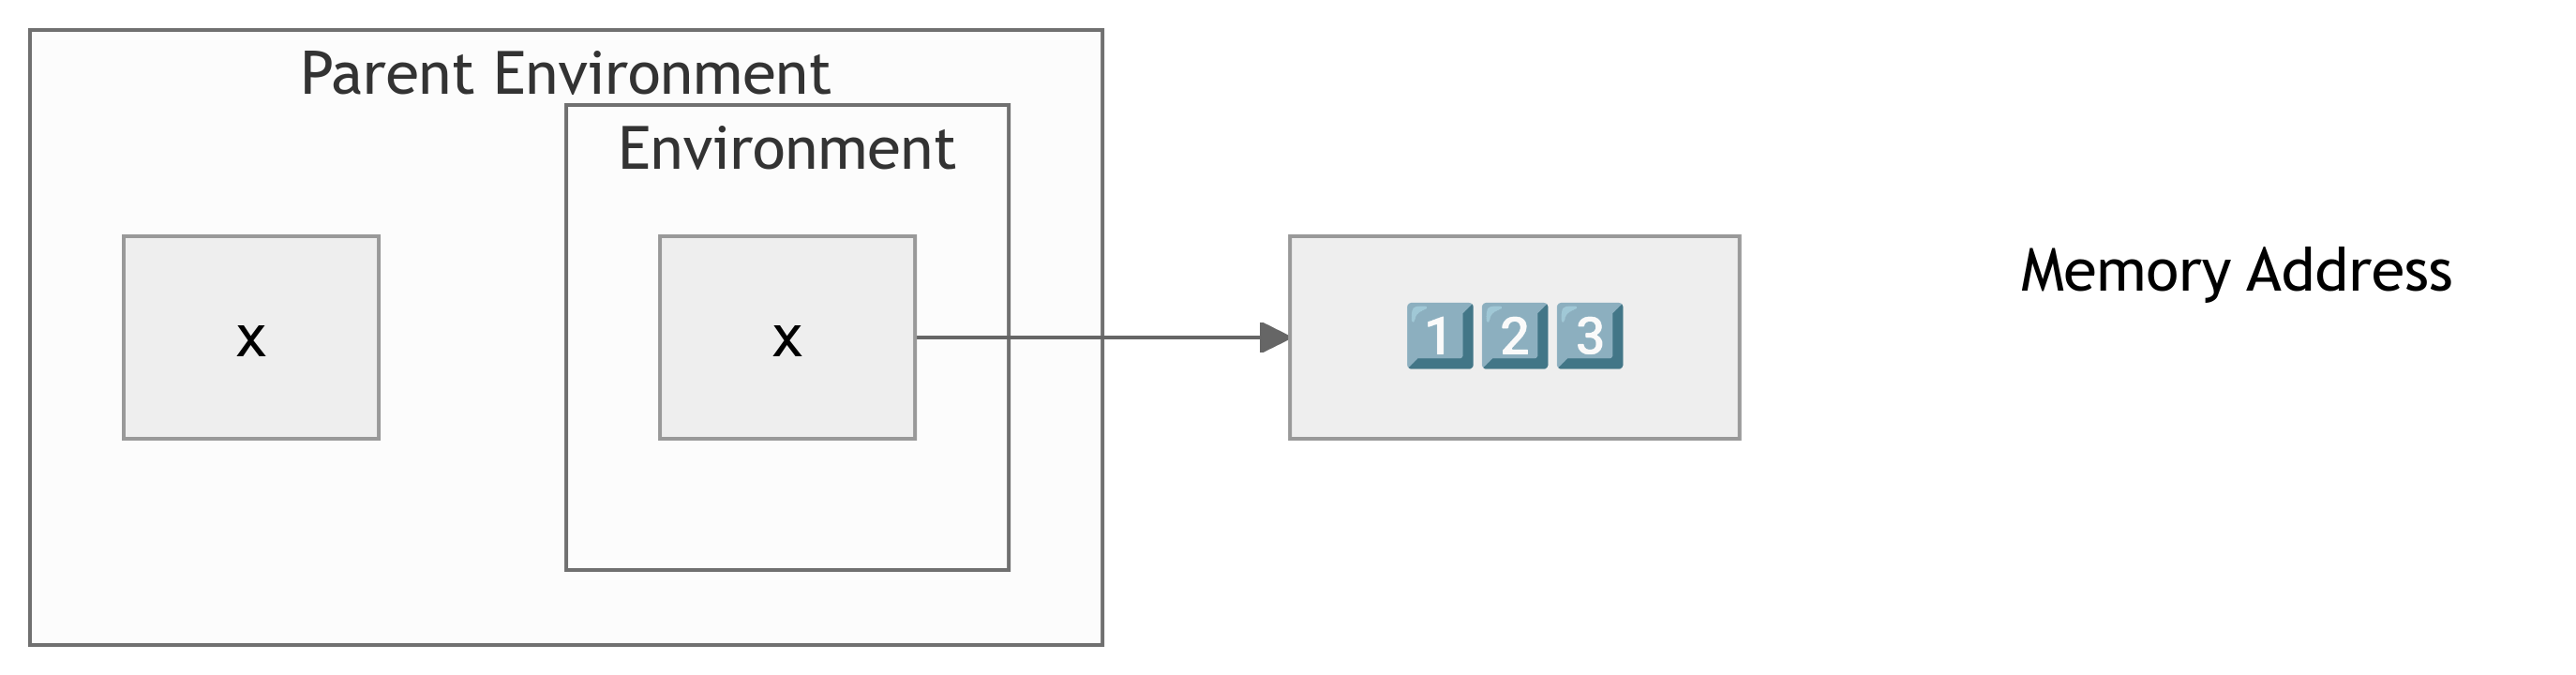

. . .

-   `<<-` (super assignment) assigns to the parent environment

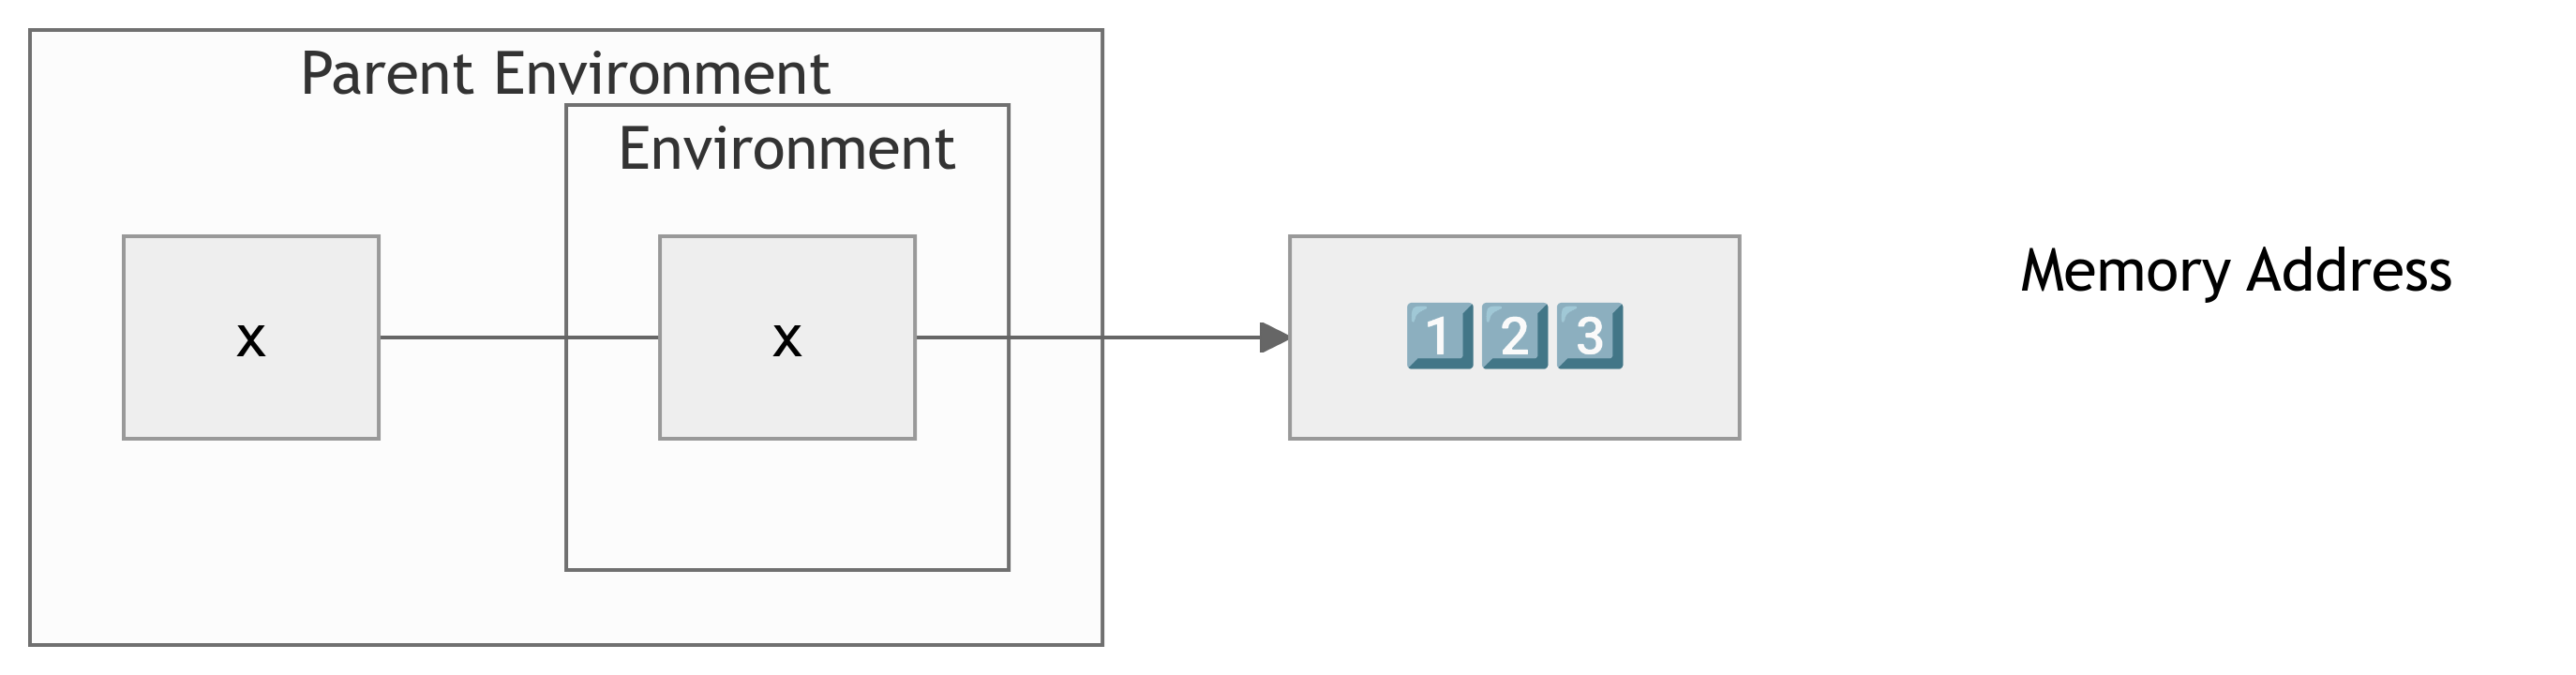

## Super Assignment: Example

In [ ]:
x <- c(4, 5, 6)
fun <- function() {
    x <<- c(1, 2, 3)
}
fun()
x

[1] 1 2 3

. . .

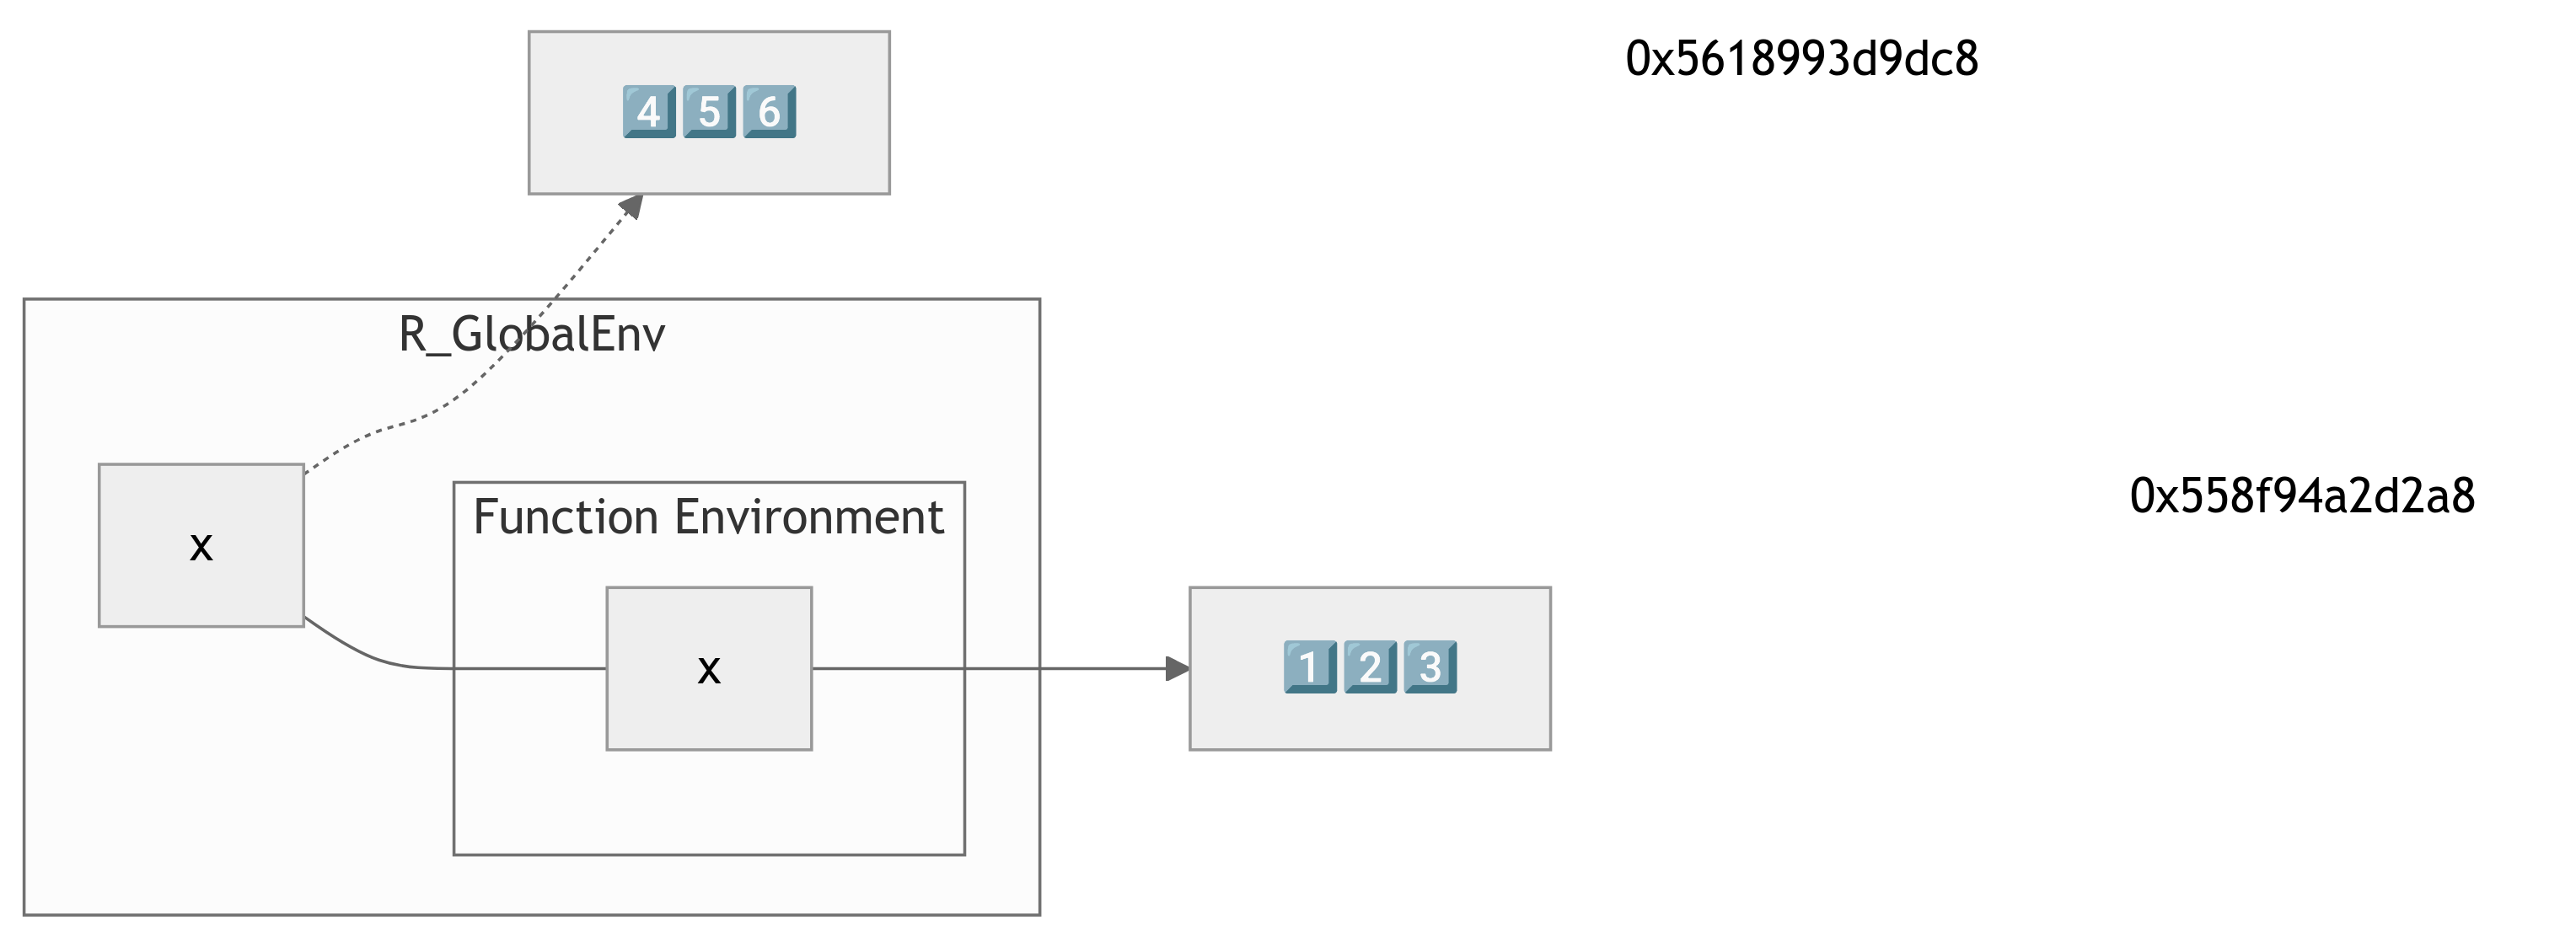

## Packages

-   Program can access functionality of a package using `library()`
    function.
-   Every package has its own namespace (which can accessed with `::`).
-   All core R functions are part of the `base` package.
-   Many statistical functions are also included in the `stats` package.

<!-- -->

    library(<package_name>)
    <package_name>::<object_name>

. . .

In [ ]:
base::mean(c(1, 2, 3))

[1] 2

. . .

In [ ]:
stats::rnorm(n = 10, mean = 1.5, sd = 0.5)

 [1] 1.5283415 0.8939231 1.6451378 1.0654391 0.6433967 2.0177643 2.2600257
 [8] 1.4694363 1.0970772 1.5531584

## Package Environment: Example

-   Let’s load some library.

In [ ]:
# Package 'Matrix' is part of the standard R library
# and doesn't have to be installed separately.
library("Matrix")

. . .

-   While it is possible to just use functions from the library after
    loading it, it is good practice to state explicitly which package
    the object is coming from.

In [ ]:
# Specify that sparseVector() function is coming from the Matrix package.
sv <- Matrix::sparseVector(x = c(1, 2, 3), i = c(3, 6, 9), length = 10)

. . .

In [ ]:
sv

sparse vector (nnz/length = 3/10) of class "dsparseVector"
 [1] . . 1 . . 2 . . 3 .

# Infix Functions

## 

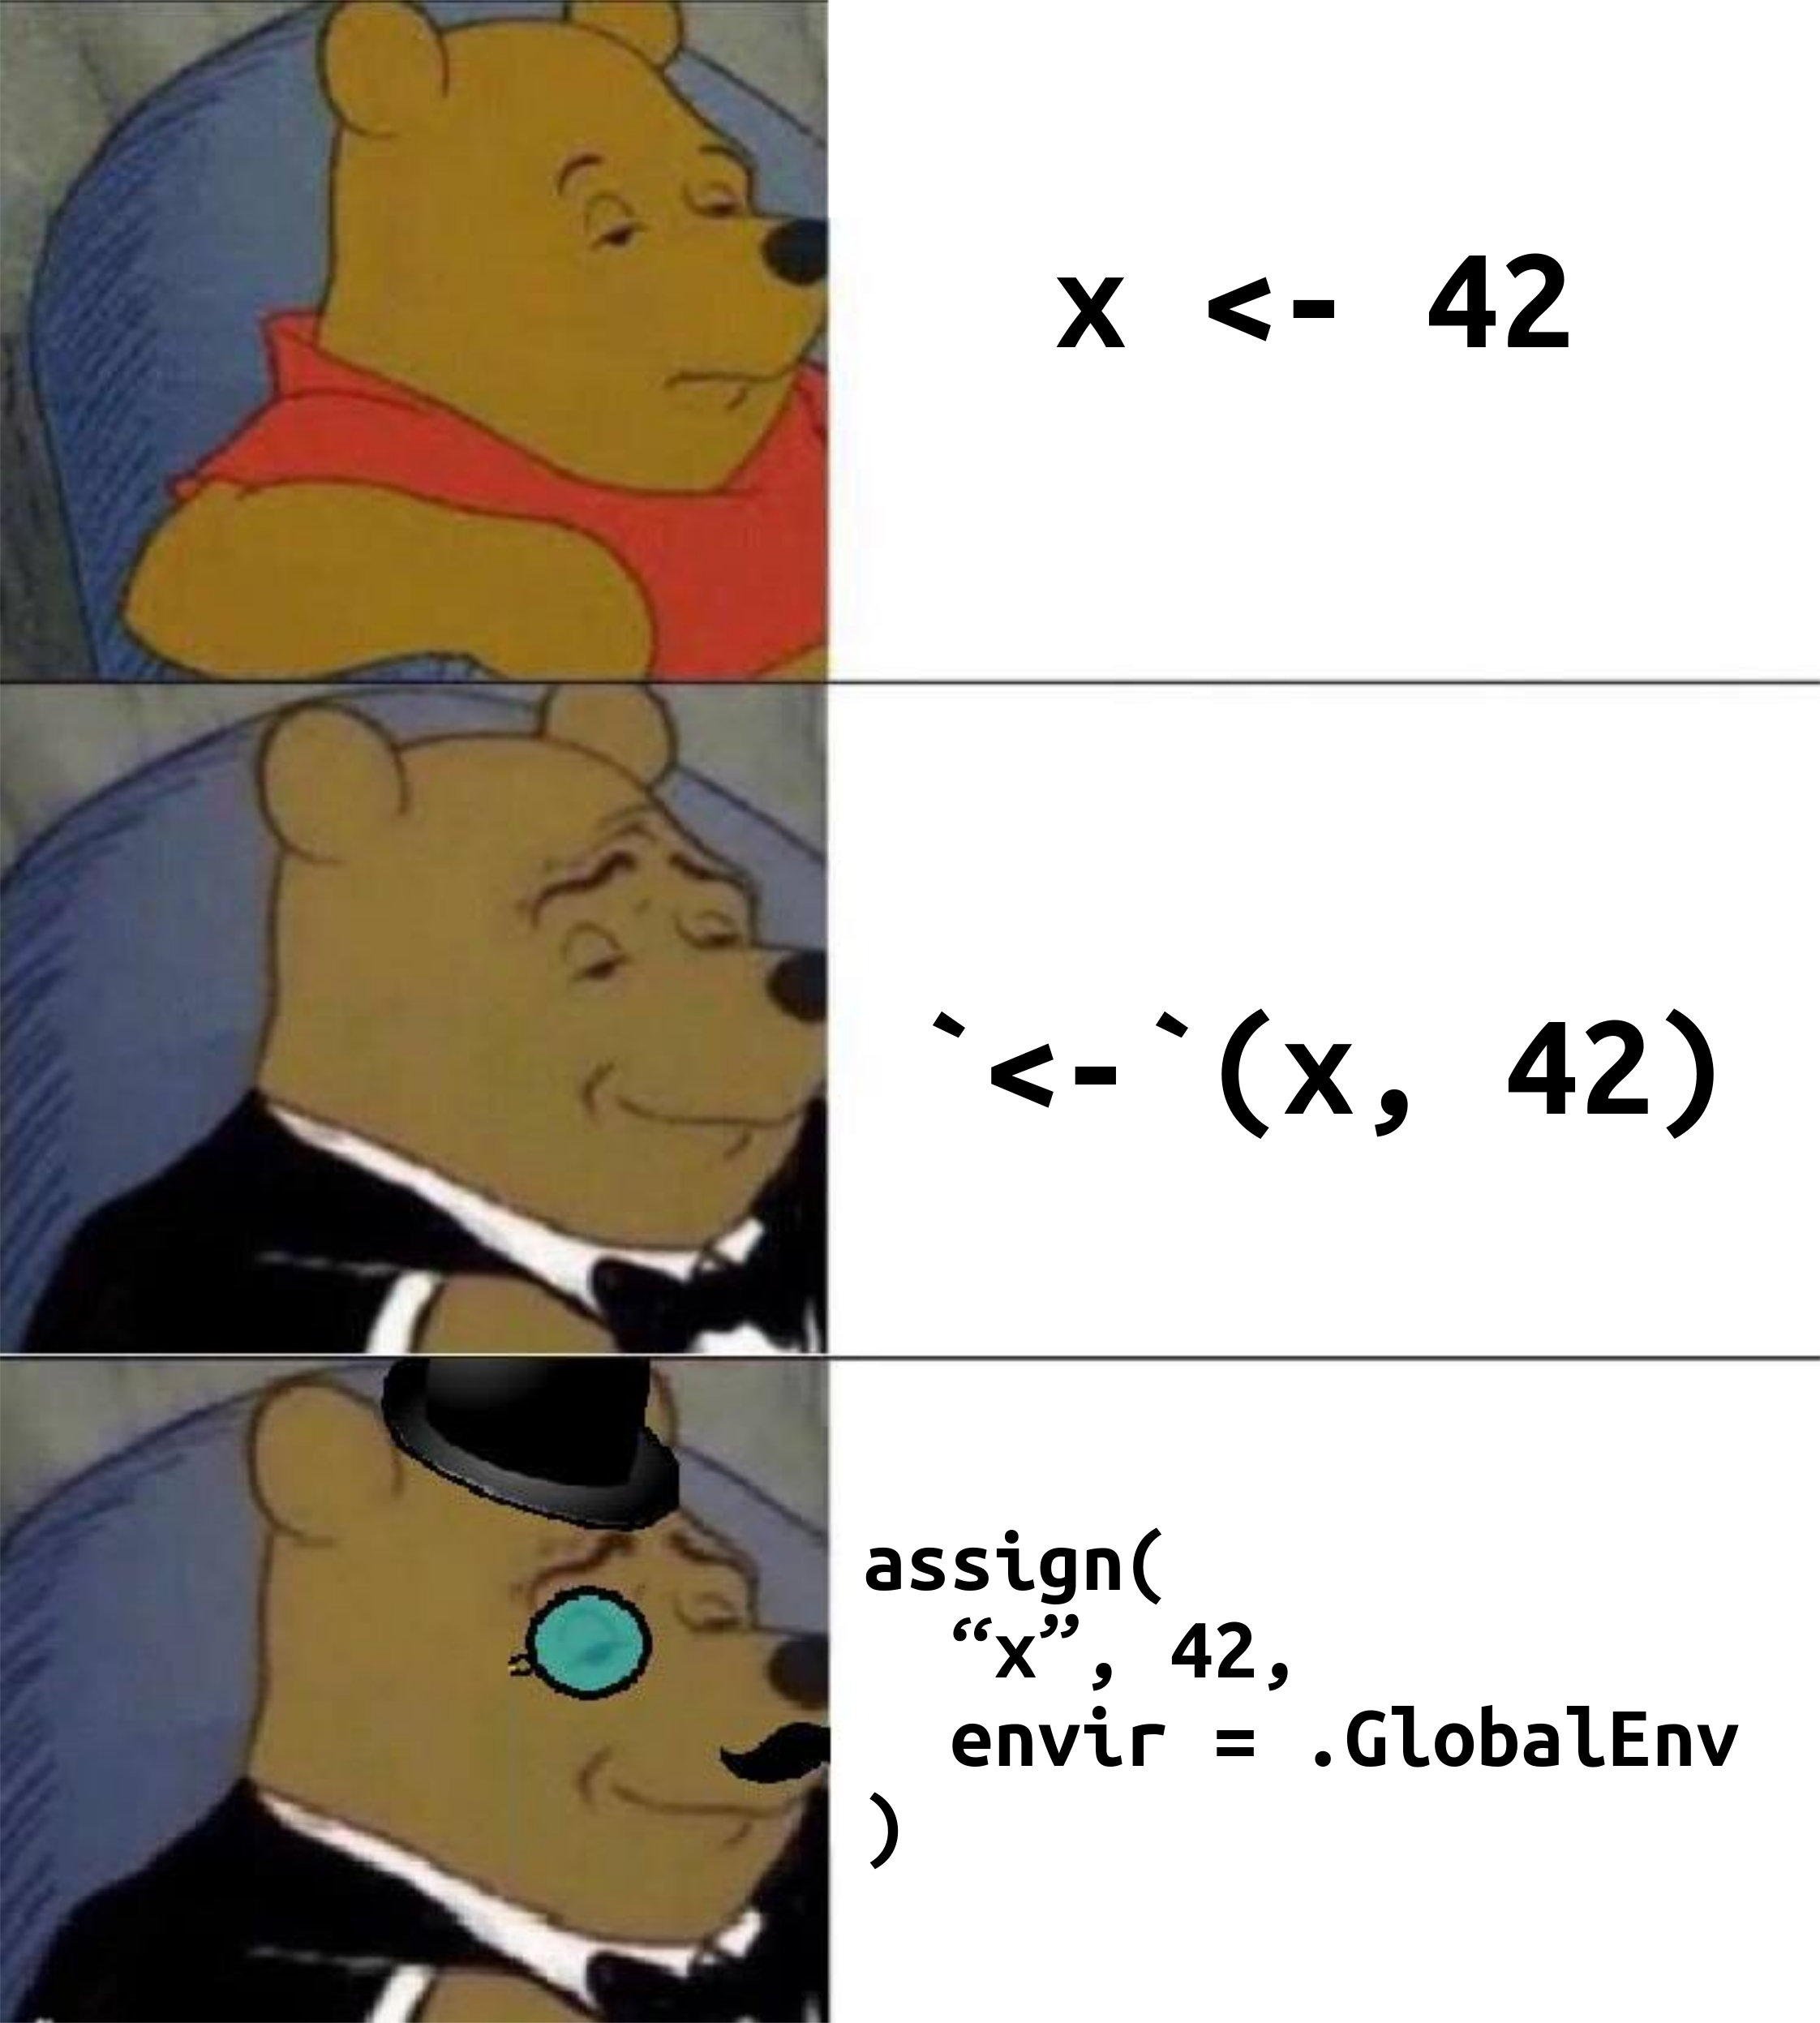

## Operations as Function Calls

``` r
y <- 9

for (x in 1:y) {
  if (x > 2) {
    xy <- x * y
    cat(x, "*", y, "=", xy, "\n")
  }
}
```

    3 * 9 = 27 
    4 * 9 = 36 
    5 * 9 = 45 
    6 * 9 = 54 
    7 * 9 = 63 
    8 * 9 = 72 
    9 * 9 = 81 

``` r
`<-`(y, 9)

`for`(x, `:`(1, y), `{`(
  `if`(`>`(x, 2), `{`(
    `<-`(xy, `*`(x, y)),
    `cat`(x, "*", y, "=", xy, "\n")
  ))
))
```

    3 * 9 = 27 
    4 * 9 = 36 
    5 * 9 = 45 
    6 * 9 = 54 
    7 * 9 = 63 
    8 * 9 = 72 
    9 * 9 = 81 

## Infix Functions

In [ ]:
`+`(3, 2) # Equivalent to: 3 + 2

[1] 5

. . .

In [ ]:
`<-`(x, c(10, 12, 14)) # x <- c(10, 12, 14)
x

[1] 10 12 14

. . .

In [ ]:
`>`(x, 10) # x > 10

[1] FALSE  TRUE  TRUE

. . .

In [ ]:
`[[`(x, 3) # x[[3]]

[1] 14

. . .

In [ ]:
`[`(x, c(1, 3)) # x[c(1,3)]

[1] 10 14

# Functionals

## Anonymous Functions

-   While R has no special syntax for creating anonymous (aka lambda in
    Python) function.
-   Note that the result of `function()` does not have to be bound to a
    name.
-   Thus function `function()` can be easily incorporate into other
    function calls.

. . .

In [ ]:
function(x) 1

function (x) 
1

## Anonymous Functions: Example

In [ ]:
add_timestamp <- function() {
  # structure() returns a given R object with attributes
  return(function(x) structure(x, timestamp = Sys.time()))
}
at <- add_timestamp()

. . .

In [ ]:
at # 'at' is just a function, which is yet to be invoked (called)

function (x) 
structure(x, timestamp = Sys.time())
<environment: 0x583afcf4ad30>

. . .

In [ ]:
at("Some record") # Here we call this function and supply "Some record" as an argument

[1] "Some record"
attr(,"timestamp")
[1] "2025-10-20 12:12:51 IST"

. . .

In [ ]:
l <- list(2:4, "a", B = c(TRUE, FALSE, FALSE), NULL)
lapply(l, function(x) if(length(x) > 0) x else NA)

[[1]]
[1] 2 3 4

[[2]]
[1] "a"

$B
[1]  TRUE FALSE FALSE

[[4]]
[1] NA

## Functionals

-   **Functionals** are functions that take other functions as one of
    their inputs.
-   Due to R’s functional nature, functionals are frequently used for
    many tasks.
-   `apply()` family of base R functionals is the most ubiquitous
    example.
-   Their most common use case is an alternative of `for` loops.
-   Loops in R have a reputation of being slow (not always warranted).
-   Functionals also allow to keep code more concise.

## Functionals: Example

In [ ]:
# Applies a supplied function to a random draw
# from the normal distribution with mean 0 and sd 1
functional <- function(f) { f(rnorm(10)) }

. . .

In [ ]:
set.seed(100)
rnorm(10)

 [1] -0.50219235  0.13153117 -0.07891709  0.88678481  0.11697127  0.31863009
 [7] -0.58179068  0.71453271 -0.82525943 -0.35986213

In [ ]:
set.seed(100)
functional(mean)

[1] -0.01795716

. . .

In [ ]:
set.seed(100)
functional(median)

[1] 0.01902709

. . .

In [ ]:
set.seed(100)
functional(sum)

[1] -0.1795716

## `apply()` Family of Functions

| Function | Description | Input Object | Output Object | Simplified |
|:------|:----------------------------------|:------------|:------------|:------|
| `apply()` | Apply a given function to margins (rows/columns) of input object | matrix/array/data.frame | vector/matrix/array/list | Yes |
| `lapply()` | Apply a given function to each element of input object | vector/list | list | No |
| `sapply()` | Same as `lapply()`, but output is **s**implified | vector/list | vector/matrix | Yes |
| `vapply()` | Same as `sapply()`, but data type of output is specified | vector/list | vector | No |
| `mapply()` | **M**ultivariate version of `sapply()`, takes multiple objects as input | vectors/lists | vector/matrix | Yes |

> **Extra**
>
> [Using apply, sapply, lapply in
> R](http://petewerner.blogspot.com/2012/12/using-apply-sapply-lapply-in-r.html)

## `lapply()` function

-   Takes a function and a vector or list as input
-   Applies the input function to each element in the list
-   Returns list as an onput

<!-- -->

    lapply(<input_object>, <function_name>, <arg_1>, ..., <arg_n>)

## `lapply()`: Example

In [ ]:
l <- list(a = 1:2, b = 3:4, c = 5:6, d = 7:8, e = 9:10)

. . .

In [ ]:
# Apply sum() to each element of list 'l'
lapply(l, sum)

$a
[1] 3

$b
[1] 7

$c
[1] 11

$d
[1] 15

$e
[1] 19

. . .

In [ ]:
# We can exploit the fact that basic operators are function calls
# Here, each subsetting operator `[` with argument 2 is applied to each element
# Which gives us second element within each element of the list
lapply(l, `[`, 2)

$a
[1] 2

$b
[1] 4

$c
[1] 6

$d
[1] 8

$e
[1] 10

## `apply()` Function

-   Works with higher-dimensional (\> 1d) input objects (matrices,
    arrays, data frames)
-   Is a common tool for calculating summaries of rows/columns
-   `<margin>` argument indicates whether function is applied across
    rows (1) or columns (2)

<!-- -->

    apply(<input_object>, <margin>, <function_name>, <arg_1>, ..., <arg_n>)

## `apply()`: Example

In [ ]:
m <- matrix(1:12, nrow = 3, ncol = 4)
m

     [,1] [,2] [,3] [,4]
[1,]    1    4    7   10
[2,]    2    5    8   11
[3,]    3    6    9   12

. . .

In [ ]:
# Sum up rows (can also be achieved with rowSums() function)
apply(m, 1, sum)

[1] 22 26 30

. . .

In [ ]:
# Calculate averages across columns (also available in colMeans())
apply(m, 2, mean)

[1]  2  5  8 11

. . .

In [ ]:
# Find maximum value in each column
apply(m, 2, max)

[1]  3  6  9 12

## `mapply()` Function

-   Takes a function and multiple vectors or lists as input.
-   Applies the function to each corresponding element of input
    sequences.
-   Simplifies output into vector (if possible).
-   `Map()` calls `mapply()` without simplification (always returns a
    list).

<!-- -->

    mapply(<function_name>, <input_object_1>, ..., <input_object_n>, <arg_1>, ..., <arg_n>)

## `mapply()`: Example

In [ ]:
means <- -2:2
sds <- 1:5

. . .

In [ ]:
# Generate one draw from a normal distribution where
# each mean is an element of vector 'means'
# and each standard deivation is an element of vector 'sds'
#
# rnorm(n, mean, sd) takes 3 arguments: n, mean, sd

mapply(rnorm, 1, means, sds)

[1] -1.9101139 -0.8074511 -0.6049019  3.9593620  2.6168975

. . .

In [ ]:
# While simplification of output
# (attempt to collapse it in fewer dimensions)
# makes hard to predict the object returned 
# by apply() functions that have simplified = TRUE by default

mapply(rnorm, 5, means, sds)

           [,1]       [,2]       [,3]       [,4]      [,5]
[1,] -2.0293167 -1.8761800 -1.3153517  0.6355458 0.8910288
[2,] -2.3888542  0.5281212 -2.1606647  8.0295025 2.9145384
[3,] -1.4891437 -0.4760774  0.6928336  0.4482816 4.0866164
[4,] -2.9138142  0.5468092 -3.4731884  0.5552260 7.3270116
[5,]  0.3102968 -2.6287582  0.7412280 -1.7600573 6.8510101

## Functional Programming

The three main criteria of functional programming as a computing
paradigm are:

1.  Any computation can be expressed as a function call.
2.  The value of the call is uniquely defined by the values of the
    arguments.
3.  The effect of a function call is simply the value returned (no
    side-effects).

## Next

-   Tutorial: Implementing functions
-   Next week: Debugging and Testing in R